<center><h1>Computer lab 4: Ordinary Differential Equations (ODEs)</h1></center>
<center><h2>Part 3: Under the hood</h2></center>

_In part 1 and 2 of this lab you solved ODEs with the built-in ODE solver in ScyPy, <code>solve_ivp</code>. But what is happening under the hood, inside that solver? We will look at that here by looking at three numerical methods for ODE's that principally work in same way as <code>solve_ivp</code>._ <br>
<hr>

<h3>Preparations</h3>

<p>First, define the Python functions that you will use in this part. Each cell below contain a numerical method implemented in a function. You will use all three, so define the functions by running the cells.
    <p>

In [ ]:
def Euler(func, y0, tspan, h, args=[]):
    # Euler's method

    # Define time axis t and initialize solution vetcor y
    t = np.arange(tspan[0], tspan[1], h)
    y = np.zeros(t.size)
    y[0] = y0  # Store initial value first in y

    for tidx in np.arange(1, t.size):
        y[tidx] = y[tidx - 1] + h * func(t[tidx - 1], y[tidx - 1], *args)

    # if we didn't reach the last time point, add a shorter time-step
    if not tspan[1] == t[-1]:
        hfinal = tspan[1] - t[-1]
        yfinal = y[-1] + hfinal * func(t[-1], y[-1], *args)
        t = np.append(t, tspan[1])
        y = np.append(y, yfinal)

    return t, y

In [ ]:
def Heun(func, y0, tspan, h, args=[]):
    # Heun's method (2-stage Runge-Kutta method)

    t = np.arange(tspan[0], tspan[1], h)
    y = np.zeros(t.size)
    y[0] = y0

    for tidx in np.arange(1, t.size):
        k1 = h * func(t[tidx - 1], y[tidx - 1], *args)
        k2 = h * func(t[tidx - 1] + h, y[tidx - 1] + k1, *args)
        y[tidx] = y[tidx - 1] + 0.5 * (k1 + k2)

    if not tspan[1] == t[-1]:
        hfinal = tspan[1] - t[-1]
        k1 = func(t[-1], y[-1], *args)
        k2 = func(t[-1] + hfinal, y[-1] + hfinal * k1, *args)
        yfinal = y[-1] + 0.5 * hfinal * (k1 + k2)

        t = np.append(t, tspan[1])
        y = np.append(y, yfinal)

    return t, y

In [ ]:
def RK4(func, y0, tspan, h, args=[]):
    # Classical Runge-Kutta (4-stage Runge-Kutta method)

    t = np.arange(tspan[0], tspan[1], h)
    y = np.zeros(t.size)
    y[0] = y0

    for tidx in np.arange(1, t.size):
        k1 = h * func(t[tidx - 1], y[tidx - 1], *args)
        k2 = h * func(t[tidx - 1] + 0.5 * h, y[tidx - 1] + 0.5 * k1, *args)
        k3 = h * func(t[tidx - 1] + 0.5 * h, y[tidx - 1] + 0.5 * k2, *args)
        k4 = h * func(t[tidx - 1] + h, y[tidx - 1] + k3, *args)
        y[tidx] = y[tidx - 1] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    if not tspan[1] == t[-1]:
        hfinal = tspan[1] - t[-1]
        k1 = hfinal * func(t[-1], y[-1], *args)
        k2 = hfinal * func(t[-1] + 0.5 * hfinal, y[-1] + 0.5 * k1, *args)
        k3 = hfinal * func(t[-1] + 0.5 * hfinal, y[-1] + 0.5 * k2, *args)
        k4 = hfinal * func(t[-1] + hfinal, y[-1] + k3, *args)
        yfinal = y[-1] + 1.0 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

        t = np.append(t, tspan[1])
        y = np.append(y, yfinal)

    return t, y

<p>You will work with the same ODE as in part 1, i.e. the bacteria growth example. Therefore, define the ODE right-hand-side by running the cell below
    </p>

In [ ]:
# This function defines the right-hand-side in
def ode_rhs(t, y, k, p):
    yt = (k * y) * (1 - (y / p))
    return yt

<br>
<hr>
<br>
<h3>Euler's method - step by step</h3>
<p>
The simplest numerical ODE-method is Euler's method. Even if it is simple, the principles are the same for other more complicated methods as well. Therefore we will start looking at Euler's method.</p>
<p>
An general ODE can be written as
$$ \left\{ \begin{array}{l}
y'(t) = f(t,y)\\
y(t_0) = y_0, \; \; t\ge 0
\end{array} \right.
$$
    </p>
    <p>
The  basic principle is o use the fact that the derivative $y'(t)$ is equivalent with the tangent line (the slope) in point $t$. This means that we have an expression, $f(t,y)$, for the tangent line in every time-point.
    </p>
    <p>
The idea is to start at $y(t_0)$ (the initial value, which is known) and take a step along the tanget line at that point. This gives a new approximation $y(t_1)$. Then, take a step along the tangent line in $y(t_1)$ to get next point $y(t_2)$. Repeat the same pattern until reaching the final point in the time interval.</p>
<p>
Try this out by running the code below. We run the same ODE as in part 1, but the time interval and the parameters are changed. To begin with the length of the time-step, $h$ is 0.8. Run the code and try to see how Euler's method works (tangent line etc.). The code will produce a graph each time step. Input any character to continue the computations, until you reach the end of the time interval. You can stop before the by hitting the <code>return</code>-key.
</p>
<p>
Run the program several times, with slightly smaller time-step, for example $h=0.6$ and $h=0.5$. Is the result better or worse? What would you think would happen if $h$ very small? (Don't try it here though, you will only see a thick line).
    </p>

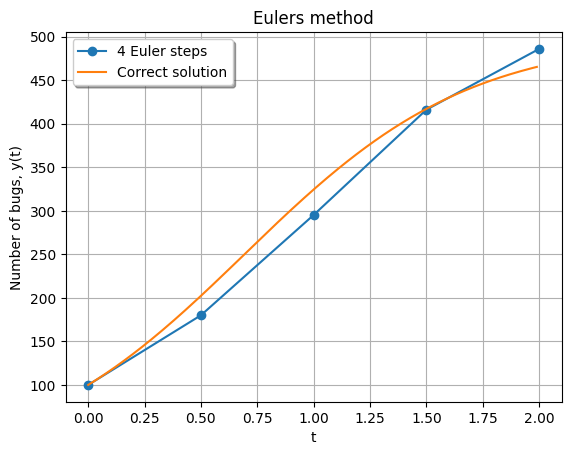

In [10]:
# Run this code. You can change the lenght of the times step h, and run
# The code again

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Time step. Don't choose to small timestep here, it'll just lead to
# a thick line and you won't be able to see anything. For example h=0.4,
# h, = 0.5, h=0.6, h=0.7, h=0.8 works pretty well

# Define time-step
h = 0.5

t0 = 0.0  # Start time
t1 = 2  # Final time
tspan = (t0, t1)  # Time interval
y0 = 100.0  # Initial value

# Define the ODE parameters
k = 2
p = 500

# Use Euler to compute the solution
te, ye = Euler(ode_rhs, y0, tspan, h, args=(k, p))

# Get the "correct" solution using solve_ivp
times = np.arange(t0, t1, 0.01)
bacteria = solve_ivp(ode_rhs, tspan, [y0], t_eval=times, args=(k, p))

# Plot the solution
plt.plot(te, ye, "-o", label=(str(len(te) - 1) + " Euler steps"))
plt.plot(bacteria.t, bacteria.y[0], label="Correct solution")
plt.title("Eulers method")
plt.xlabel("t")
plt.ylabel("Number of bugs, y(t)")
plt.legend(shadow=True)
plt.grid(which="major")
plt.show()


<p>
The solution is only computed in the points with blue dots in the graph, in <i>discrete</i> points and we say that we discretize the the problem. The blue straight lines is just drawn in between for visualization purposes. For example, if $h=0.5$, the solutions will be approximated in $t=0.5, t=1, t=1.5, t=2.0$, i.e. we get the solutions.</p>
<p>
Check it (set <code>h=0.5</code> and run the program and print the time-axis <code>te</code> below).
</p>


In [12]:
# Add you code to print the time axis here
print(te)

[0.  0.5 1.  1.5 2. ]


<p>Usually the approximative solutions we get are numbered with a index, like $y_1, y_2$ and so forth. In the above example we have<br>
$$ \begin{array}{l}
y_0 = y(0) \; \mbox{ this is the initial value}\\
y_1 = y(0.5) \\
y_2 = y(1.0) \\
y_3 = y(1.5) \\
y_4 = y(2.0)
\end{array}
$$
</p>
<p>&nbsp;</p>
<p>
Note that the approximation gets better when you choose smaller time-steps $h$ gets. The difference between the correct solution and the Euler solution,  i.e. the error you can see here is not the roundoff error (which is way smaller), but something called <b>discretization error</b>.
    </p>

<h3>Other ODE-methods</h3>
<p>Euler's method is not a very good method for different reason, and other methods are used in practice. They work according to the same principles, but they weigh together several tangent lines, which results in more accurate solutions. We will here compare Euler's method with two other methods, namely <i>Heun's method</i> and <i>Classical Runge-Kutta</i>.</p>
<p>
Run the code below and compare the methods. You can change $h$ and see how close the three methods are to the true solution. Try for example <code>h = 1</code>. If you look at the accuray (in the graphs), which one seems to be the best, the 2nd best and the worst? What happens with the solution when you choose smaller time-step $h$?.
    </p>

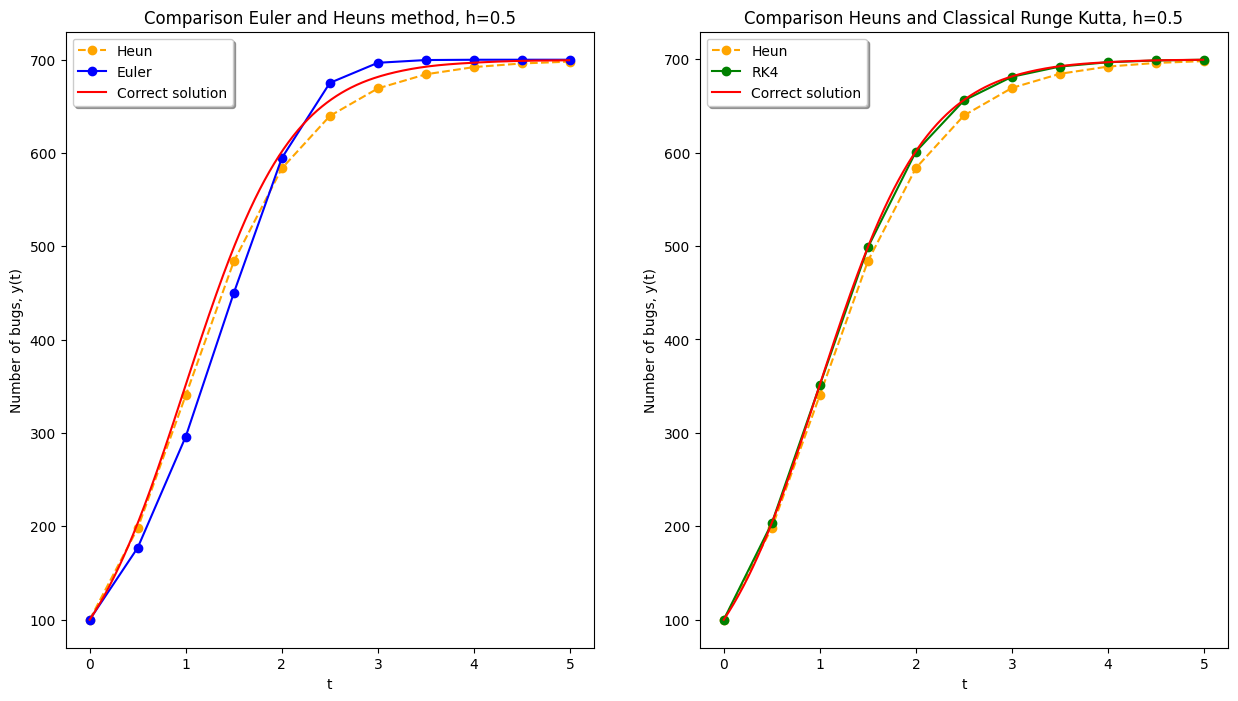

In [14]:
# Run this code to compare the methods. You can change the time-step h and run
# again.

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Time-step. Change this variable and run the code again
h = 0.5

t0 = 0.0  # Start time
t1 = 5  # Final time
tspan = (t0, t1)  # Time interval
y0 = 100.0  # Initial value, must be a vector (here 1D)

# Define parameter
k = 1.8  # Growth constant
p = 700

# Run Euler, Heun and Classical Runge-Kutta and for
# comparison solve_ivp
te, ye = Euler(ode_rhs, y0, tspan, h, args=(k, p))
th, yh = Heun(ode_rhs, y0, tspan, h, args=(k, p))
trk, yrk = RK4(ode_rhs, y0, tspan, h, args=(k, p))
times = np.arange(t0, t1, 0.01)
bacteria = solve_ivp(ode_rhs, tspan, [y0], t_eval=times, args=(k, p))

# Plot the solutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.plot(th, yh, "--o", color="orange", label="Heun")
ax1.plot(te, ye, "-o", color="blue", label="Euler")
ax1.plot(bacteria.t, bacteria.y[0], color="red", label="Correct solution")
ax1.set_title("Comparison Euler and Heuns method, h=" + str(h))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of bugs, y(t)")
ax1.legend(shadow=True)
#
ax2.plot(th, yh, "--o", color="orange", label="Heun")
ax2.plot(trk, yrk, "-o", color="green", label="RK4")
ax2.plot(bacteria.t, bacteria.y[0], color="red", label="Correct solution")
ax2.set_title("Comparison Heuns and Classical Runge Kutta, h=" + str(h))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of bugs, y(t)")
ax2.legend(shadow=True)
plt.show()

<h3>How is the error changing when the time step is changing?</h3>
<p>
As you could see in the previous plots, the error (difference betwwen the correct solution and the computed solution) decreases when a smaller time-step is choosen. But how does it change, and at what rate does it change? </p>
    <p>
The code below runs Euler's method, Heun's method and classical Runge-Kutta method for time-steps $h$ on the interval [1e-5, 1]. The absolute errors of each method is plotted as a function of step size. The program also display the slope of the curves. The slope is the same as the <i>order of accuracy</i>, and you will see that different methods have different order of accuracy.<br>
Study the plots and printed information produced when you run the program, and also pay attention to the slopes of each curve.
    </p>

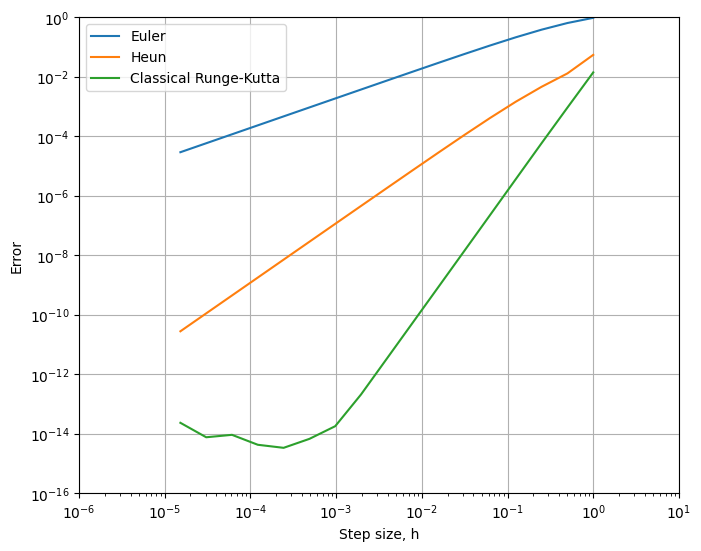

The slope of each error curve, i.e. the order of accuracy, is:
Euler's method: 1.0
Heun's method:  2.0
Runge-Kutta 4:  4.0


In [15]:
# Run this program. Don't change anything in the code.
import numpy as np
import matplotlib.pyplot as plt
from math import floor, log, log2, exp
import time


def polyfit(x, y, poly_order):
    X = np.vander(np.log(x), poly_order + 1)
    p = np.linalg.solve(
        np.matmul(np.transpose(X), X), np.matmul(np.transpose(X), np.log(y))
    )
    return p


# RHS function
def f(t, y):
    return t * y + t**3


# Exact solution
def yfunc(t, y0):
    return 3 * np.exp((t**2) / 2) - t**2 - 2


# Set ODE parameters
y0 = 1
tspan = (0, 1)

# Get h-values
hmin, hmax = (1e-5, 1)
hvec = hmax * np.power(2.0, np.arange(0, floor(log2(hmin / hmax)), -1))

# Initialize error vectors
err_Euler = np.zeros(hvec.size)
err_Heun = np.zeros(hvec.size)
err_RK4 = np.zeros(hvec.size)

yexact = yfunc(tspan[1], y0)

for idx, h in enumerate(hvec):
    t, y = Euler(f, y0, tspan, h)
    err_Euler[idx] = abs(y[-1] - yexact)

    t, y = Heun(f, y0, tspan, h)
    err_Heun[idx] = abs(y[-1] - yexact)

    t, y = RK4(f, y0, tspan, h)
    err_RK4[idx] = abs(y[-1] - yexact)

# Get slopes
ids = list(range(4, 10, 1))
line_Euler = polyfit(hvec[ids], err_Euler[ids], 1)
line_Heun = polyfit(hvec[ids], err_Heun[ids], 1)
line_RK4 = polyfit(hvec[ids], err_RK4[ids], 1)

# Plot errors vs. step sizes
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.15, bottom=0.20)

ax.loglog(hvec, err_Euler, label="Euler")
ax.loglog(hvec, err_Heun, label="Heun")
ax.loglog(hvec, err_RK4, label="Classical Runge-Kutta")
plt.grid()
plt.xlim([0.1 * hmin, 10 * hmax])
plt.ylim([1e-16, 1e0])
plt.xlabel("Step size, h")
plt.ylabel("Error")
plt.legend()
plt.show()

print("The slope of each error curve, i.e. the order of accuracy, is:")
print("Euler's method:", np.around(line_Euler[0], 0))
print("Heun's method: ", np.around(line_Heun[0], 0))
print("Runge-Kutta 4: ", np.around(line_RK4[0], 0))

<p>Higher order of accuracy means that the error get's smaller at a higher rate when $h$ gets smaller. It also means that, for a certain error, we can choose a larger $h$, and a larger $h$ means fewer points to ccompute the solution in, i.e. less computations.</p><p>
In the example above, let's say it's enough with error $10^{-4}$. Roughly what step length would we need for the Euler's method, Heun's method and Classical Runge-Kutta, respectively? Look at the graph and try to roughly find what time step $h$ is needed for the three methods.
    </p>

<h3>So, what's the relevance for ScyPy's ODE-solver, solve_ivp?</h3>
<p>
In the built-in solver, <code>solve_ivp</code>...
<ul>
<li>the time-step $h$ is chosen automatically so that a certain error tolerance is kept. You can change the error tolerance, but the time-step is hidden.</li>
<li>the default method used is a method called 'Runge-Kutta 45', which is a version of Classical Runge-Kutta, where automatic control of the error is built in to the method. </li>
<li>it is actually possible to specify and change the method, for example<br>
<code>solve_ivp(ode_rhs, tspan, [y0], t_eval=times, args=(k,p), method='RK23')</code><br>
would solve the ODE with a different Runga-Kutta-method (with lower order of accuracy). The default is <code>method='RK45'</code>. </li>
</ul>
</p>